In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('C:/Users/10903059/PycharmProjects/python_course/day_3/stock_day3.csv', encoding = 'utf-8')
df

,Unnamed: 0,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,0,109/06/01,"1,644,712","39,737,487",24.00,24.25,24.00,24.20,+0.25,628
1,1,109/06/02,"1,939,686","47,101,812",24.20,24.35,24.20,24.30,+0.10,651
2,2,109/06/03,"1,772,372","43,151,703",24.40,24.45,24.25,24.35,+0.05,"1,007"
3,3,109/06/04,"1,259,788","30,618,455",24.40,24.45,24.25,24.25,-0.10,520
4,4,109/06/05,"1,380,620","33,550,854",24.35,24.35,24.25,24.30,+0.05,496
...,...,...,...,...,...,...,...,...,...,...
328,328,110/09/30,"4,332,781","177,193,317",40.50,41.20,40.45,41.10,+0.60,"1,995"
329,329,110/10/01,"7,235,666","291,911,202",41.10,41.10,39.80,40.20,-0.90,"3,334"
330,330,110/10/04,"7,842,460","307,171,528",40.20,40.45,38.25,38.45,-1.75,"3,852"
331,331,110/10/05,"5,604,631","216,153,284",38.25,39.35,37.75,39.30,+0.85,"2,544"


In [3]:
# 作業講解, 針對收盤價 做移動頻均
df = pd.read_csv('C:/Users/10903059/PycharmProjects/python_course/day_3/stock_day3.csv', encoding = 'utf-8')
df
df_close = df['收盤價']
my_data = df_close.values.tolist()
windows_size = 3
my_w_data_roll = []
for idx , value in enumerate(my_data):
    if idx >=windows_size-1:
        w_data = my_data[idx-windows_size+1:idx+1]
        w_data_mean = np.array(w_data).mean()
        my_w_data_roll.append(w_data_mean)
    else:
        my_w_data_roll.append('NaN')
my_w_data_roll
#太多小數點了, 用不到
# a = []
# for i in my_w_data_roll:
#     if type(i)!=str:
#         j = round(i,2)
#         a.append(j)
#     else:
#         a.append(i)
my_w_data_roll = [round(i,2) if type(i)!=str else 'NaN' for i in my_w_data_roll]
my_w_data_roll
#[24.2 , 24.3 , 24.35 , 24.25 , 24.3 , 24.3 , 24.3 , 24.3 , 24.3 , 22.35]
# 學習重點:
# 1. 學到了 pd讀csv 如何轉換成list (df_close.values.tolist())
# 2. enumerate枚舉, 並且針對回傳的idx位置做判斷
# 3. for in 裡面包if else判斷,=> 寫成一行如何撰寫

['NaN',
 'NaN',
 24.28,
 24.3,
 24.3,
 24.28,
 24.3,
 24.3,
 24.3,
 23.65,
 22.85,
 22.08,
 22.03,
 22.08,
 22.22,
 22.28,
 22.32,
 22.23,
 22.13,
 22.22,
 22.37,
 22.72,
 23.0,
 23.15,
 23.03,
 22.88,
 22.83,
 22.78,
 22.78,
 22.7,
 22.8,
 22.85,
 22.95,
 22.95,
 22.97,
 23.15,
 23.43,
 23.62,
 23.62,
 23.47,
 23.47,
 23.48,
 23.55,
 23.7,
 23.83,
 23.97,
 23.93,
 23.88,
 23.95,
 24.17,
 24.43,
 24.57,
 24.63,
 24.9,
 25.25,
 25.52,
 25.32,
 25.2,
 25.15,
 25.37,
 25.45,
 25.48,
 25.57,
 25.98,
 26.47,
 27.13,
 27.58,
 28.25,
 28.9,
 29.75,
 30.33,
 30.45,
 30.08,
 29.85,
 29.85,
 30.2,
 30.27,
 30.1,
 29.8,
 29.68,
 29.65,
 29.33,
 28.73,
 28.43,
 28.3,
 28.45,
 28.6,
 28.8,
 28.9,
 28.97,
 28.8,
 28.83,
 28.78,
 28.95,
 29.08,
 29.05,
 28.9,
 28.85,
 28.97,
 29.28,
 29.48,
 29.7,
 30.02,
 30.12,
 30.22,
 30.03,
 29.97,
 30.02,
 30.18,
 30.43,
 30.72,
 30.85,
 30.92,
 30.52,
 30.47,
 30.48,
 31.32,
 31.78,
 31.98,
 31.45,
 31.38,
 31.33,
 31.7,
 31.85,
 32.6,
 33.08,
 33.62,
 33.5,
 

In [4]:
#方法2 直接站在pd的巨人肩膀上,直接調用別人寫好的def
df['new'] = df['收盤價'].rolling(5).mean()
pd_rolling = df['new'].values.tolist()
pd_rolling_list = [round(i,2) if type(i)!=str else 'NaN' for i in pd_rolling]
pd_rolling_list
#看一下兩個方式是否一樣
if my_w_data_roll[2:] == pd_rolling_list[2:]:
    print('自己寫的土方法跟調用函式的結果一樣')
else:
    print('不一樣')

不一樣


In [5]:
#如果要用APPLY 自訂義一個函數,清理COLUMN 裡面的DATA
df = pd.read_csv('./stocK.csv', encoding = 'utf-8')
df['new'] = df['收盤價'].rolling(3).mean()
def my_filter(data):
    if type(data)!=float:
        return data
    else:
        data_f = round(data,3) 
        return data_f

df['new'] = df['new'].apply(my_filter)
df

,Unnamed: 0,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,new
0,0,109/06/01,"1,644,712","39,737,487",24.00,24.25,24.00,24.20,+0.25,628,NaN
1,1,109/06/02,"1,939,686","47,101,812",24.20,24.35,24.20,24.30,+0.10,651,NaN
2,2,109/06/03,"1,772,372","43,151,703",24.40,24.45,24.25,24.35,+0.05,"1,007",24.283
3,3,109/06/04,"1,259,788","30,618,455",24.40,24.45,24.25,24.25,-0.10,520,24.300
4,4,109/06/05,"1,380,620","33,550,854",24.35,24.35,24.25,24.30,+0.05,496,24.300
...,...,...,...,...,...,...,...,...,...,...,...
328,328,110/09/30,"4,332,781","177,193,317",40.50,41.20,40.45,41.10,+0.60,"1,995",40.950
329,329,110/10/01,"7,235,666","291,911,202",41.10,41.10,39.80,40.20,-0.90,"3,334",40.600
330,330,110/10/04,"7,842,460","307,171,528",40.20,40.45,38.25,38.45,-1.75,"3,852",39.917
331,331,110/10/05,"5,604,631","216,153,284",38.25,39.35,37.75,39.30,+0.85,"2,544",39.317


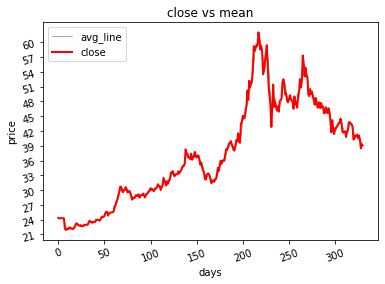

In [6]:
# 畫圖: 
# 記得一定要確保數據都是數字
#===========準備移動頻均x ,y===========
import matplotlib.pyplot as plt
x =list(range( len(my_w_data_roll)-(windows_size-1)))
y = my_w_data_roll[windows_size-1:]
#============準備收盤價的y==================
c_y = df['收盤價'].values.tolist()[windows_size-1:]
#==================get 到 數據的最大值最小值===================
c_y_max = np.array(c_y).max()
c_y_min = np.array(c_y).min()
# 設定y軸畫圖的區間尖閣
y_axis_range = np.arange(int(c_y_min) , int(c_y_max) ,3) #(起始點,終點,間隔)
# #===========開始畫圖=================

plt.plot(x,y, color = 'green',marker ='',linestyle = '-' , linewidth = 0.5 , label = 'avg_line') #畫移動頻均
plt.plot(x,c_y,color = 'red' ,marker ='',linestyle = '-' , linewidth = 2 , label = 'close') #畫收盤價線
plt.yticks(y_axis_range , rotation = 15)
plt.xticks(rotation = 20)
plt.xlabel('days')
plt.ylabel('price')
plt.title('close vs mean')
plt.legend()
plt.savefig('./my_plot.jpg') #savefig 存圖  一定要寫在show()的之前
plt.show() 
#學習重點:
# 1.針對plot作圖,要去學會去官網看一些他們寫的Def功能有哪些
# 2.畫圖的時候,要確定數據都是數字,不能有STR
# 3.存圖的話,要放在PLT.SHOW()之前

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


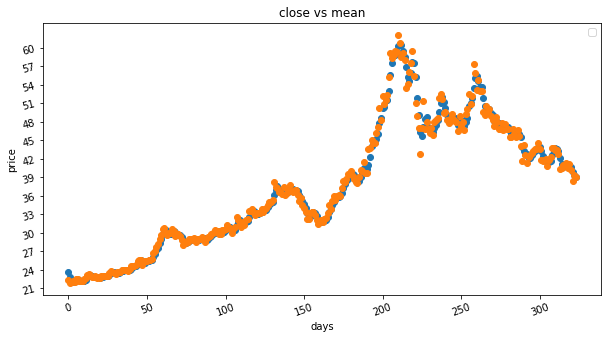

In [34]:
#目的: 把上述所有功能,包瓜WINDOWS SIZE設定寫入一個新的DEF
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('C:/Users/10903059/PycharmProjects/python_course/day_3/stock_day3.csv', encoding = 'utf-8')
df
def drew_fig( my_w_data_roll, windows_size=3 , fig_size = (10,5),plot_style='scatter'): #偷偷註記一下 (data_list, w_size)
    x =list(range( len(my_w_data_roll)-(windows_size-1)))
    y = my_w_data_roll[windows_size-1:]
    #============準備收盤價的y==================
    c_y = df['收盤價'].values.tolist()[windows_size-1:]
    #==================get 到 數據的最大值最小值===================
    c_y_max = np.array(c_y).max()
    c_y_min = np.array(c_y).min()
    # 設定y軸畫圖的區間尖閣
    y_axis_range = np.arange(int(c_y_min) , int(c_y_max) ,3) #(起始點,終點,間隔)
    # #===========開始畫圖=================
    plt.figure(figsize=fig_size) 
    if plot_style == 'plot':
        plt.plot(x,y, color = 'green',marker ='',linestyle = '-' , linewidth = 0.5 , label = 'avg_line') #畫移動頻均
        plt.plot(x,c_y,color = 'red' ,marker ='',linestyle = '-' , linewidth = 1 , label = 'close') #畫收盤價線
    elif plot_style == 'scatter':
        plt.scatter(x,y)
        plt.scatter(x,c_y)
    plt.yticks(y_axis_range , rotation = 15)
    plt.xticks(rotation = 20)
    plt.xlabel('days')
    plt.ylabel('price')
    plt.title('close vs mean')
    plt.legend()
    plt.savefig('./my_plot.jpg') #savefig 存圖  一定要寫在show()的之前
    plt.show() 
drew_fig(my_w_data_roll, windows_size=10)
#學習重點
# 1. def 中 要指定某個變數為default ,即在定義()中給定input_name = default value

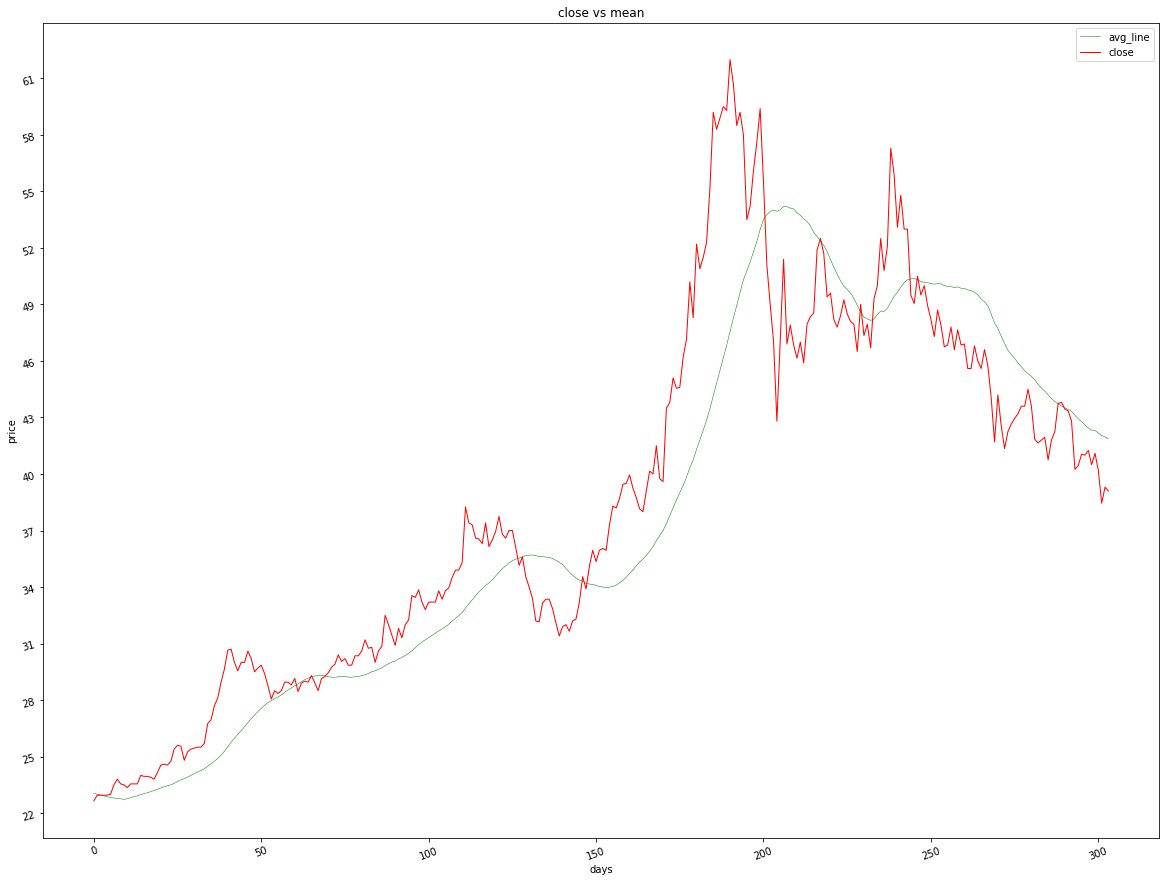

In [37]:
#把上述所有包刮讀df 進入,並且選定cloumn(收盤價這個欄位),去設定w_s=3的作圖
def plot_my_rolling_data(path = './stock.csv',
                         column_select ='收盤價',
                         window_size = 3,
                         drew_mode = True,
                         fig_size = (20,10)):
    df = pd.read_csv(path, encoding = 'utf-8')
    df_close = df[column_select]
    my_data = df_close.values.tolist()
    my_w_data_roll = []
    for idx , v in enumerate(my_data):
        if idx >= (window_size-1):
            w_data = my_data[idx-window_size+1:idx+1]
            w_data_mean = np.array(w_data).mean()
            my_w_data_roll.append(w_data_mean)
    
        else:
            my_w_data_roll.append('NaN')
    
    if drew_mode == True:
        drew_fig(my_w_data_roll,window_size,fig_size=fig_size , plot_style='plot')
    else:
        return my_w_data_roll
    
    
plot_my_rolling_data(path = './stock.csv',
                         column_select ='收盤價',
                         window_size = 30,
                         drew_mode = True,
                         fig_size=(20,15))
#學習重點:
# 1. Def 通常是自己寫好一些小功能後, 在整個縮排包裝
# 2. Def 內也可以調用其它自己寫好的DEF(前提是這個DEF 要先被定義)
# 3. 學習到使用不同的預設值,去增加作圖的彈性